In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("Preprocessed ICU data.csv")
df_x  = df.filter(regex="x$", axis = 1)
df_y  = df.filter(regex="y$", axis = 1)
df_mean_y= df_y.filter(like="Mean_")



In [47]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

X = df_mean_y
y = df["In.hospital_death"] #USE THIS FOR Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

clf_1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
Y_pred1 = clf_1.predict(X_test)  # calculate the predicted values
# print the accuracy of the RFC
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred1),3)))
print('Recall {0}'.format(np.round(recall_score(y_test, Y_pred1),3)))


# loop over all the names and feature importance and print both


# Put feature importances into a DataFrame
feature_importances_1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_1.feature_importances_
})

# Sort by importance
feature_importances_1 = feature_importances_1.sort_values(by="importance", ascending=False)

feature_importances_1.head(10)

Accuracy 0.732
Recall 0.518


,feature,importance
1,Mean_GCS.y,0.103446
8,Mean_Urine.y,0.045606
18,Mean_WBC.y,0.041045
20,Mean_PaCO2.y,0.037458
33,Mean_Lactate.y,0.037217
2,Mean_HR.y,0.036751
5,Mean_NISysABP.y,0.033921
4,Mean_NIMAP.y,0.032617
11,Mean_Glucose.y,0.032159
7,Mean_Temp.y,0.031754


In [48]:
colums_keep = ["Mean_GCS.y", "Mean_Temp.y", "Mean_PaCO2.y", "Mean_BUN.y", "Mean_Lactate.y", "Mean_WBC.y", "Mean_HR.y", "Mean_Glucose.y", "Mean_SysABP.y", "Mean_Urine.y", "Mean_Platelets.y", "Mean_HCO3.y", "Mean_Bilirubin.y"]


df_top13_mean = df_mean_y[colums_keep]

df_top13_mean



,Mean_GCS.y,Mean_Temp.y,Mean_PaCO2.y,Mean_BUN.y,Mean_Lactate.y,Mean_WBC.y,Mean_HR.y,Mean_Glucose.y,Mean_SysABP.y,Mean_Urine.y,Mean_Platelets.y,Mean_HCO3.y,Mean_Bilirubin.y
0,15.000000,36.233333,40.033301,10.0,2.08742,7.9,68.200000,117.0,120.245774,625.000000,284.0,28.0,0.20000
1,15.000000,36.640000,40.033301,25.0,2.08742,4.8,70.000000,92.0,120.245774,64.722222,97.0,20.0,1.92985
2,8.888889,37.816667,32.750000,16.5,2.08742,13.0,94.880000,153.0,125.600000,68.888889,174.0,20.5,0.40000
3,9.600000,36.980000,26.000000,58.0,2.05000,23.5,65.341463,118.5,122.758621,36.000000,102.0,12.5,0.30000
4,15.000000,36.760000,40.033301,23.0,2.08742,15.2,125.291667,112.0,120.245774,250.000000,696.0,25.0,1.92985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,10.777778,36.825000,40.033301,14.0,2.08742,11.4,85.833333,96.0,120.245774,159.062500,318.0,23.0,1.92985
1470,14.666667,36.716667,40.033301,69.0,2.08742,11.0,77.869565,102.0,120.245774,71.545455,160.0,20.0,0.90000
1471,10.000000,37.250000,37.833333,15.0,2.08742,8.0,102.458333,111.0,121.541667,154.583333,205.0,27.0,1.92985
1472,14.750000,37.185714,41.000000,18.0,1.10000,17.5,97.642857,106.0,124.500000,45.318182,218.0,22.0,1.92985


In [49]:
X = df_top13_mean
y = df["In.hospital_death"] #USE THIS FOR Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

clf_1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
Y_pred1 = clf_1.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred1),3)))
print('Recall {0}'.format(np.round(recall_score(y_test, Y_pred1),3)))


feature_importances_1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_1.feature_importances_
})

feature_importances_1 = feature_importances_1.sort_values(by="importance", ascending=False)
print(feature_importances_1.head(13))

Accuracy 0.732
Recall 0.57
             feature  importance
0         Mean_GCS.y    0.153545
9       Mean_Urine.y    0.086145
1        Mean_Temp.y    0.081500
6          Mean_HR.y    0.080510
5         Mean_WBC.y    0.075161
7     Mean_Glucose.y    0.073064
2       Mean_PaCO2.y    0.070457
10  Mean_Platelets.y    0.069299
3         Mean_BUN.y    0.067980
11       Mean_HCO3.y    0.065308
4     Mean_Lactate.y    0.063772
12  Mean_Bilirubin.y    0.056659
8      Mean_SysABP.y    0.056601


/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

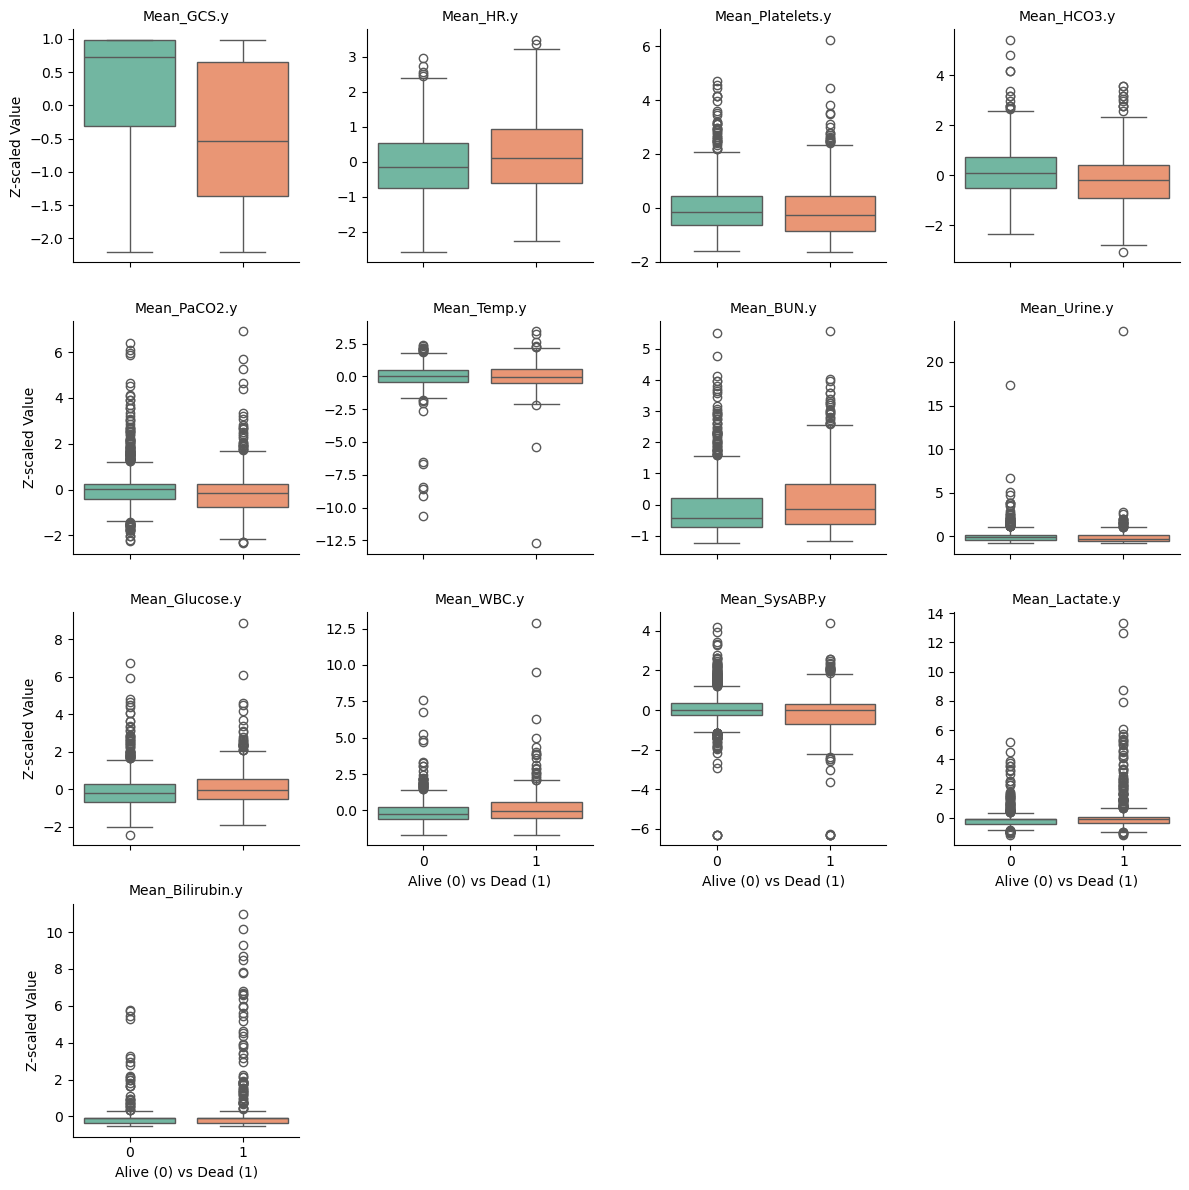

In [50]:
target = "In.hospital_death"

from sklearn.preprocessing import StandardScaler

# Select the features you want to standardize
top_features = [
    "Mean_GCS.y", "Mean_HR.y", "Mean_Platelets.y",
    "Mean_HCO3.y", "Mean_PaCO2.y", "Mean_Temp.y",
    "Mean_BUN.y", "Mean_Urine.y", "Mean_Glucose.y",
    "Mean_WBC.y", "Mean_SysABP.y","Mean_Lactate.y","Mean_Bilirubin.y"
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[top_features] = scaler.fit_transform(df[top_features])



df_melted_scaled = df_scaled.melt(
    id_vars="In.hospital_death",    # outcome variable
    value_vars=top_features,        # scaled features
    var_name="Feature",
    value_name="Value"
)

g = sns.FacetGrid(df_melted_scaled, col="Feature", col_wrap=4, sharey=False, height=3)
g.map_dataframe(sns.boxplot, x="In.hospital_death", y="Value", palette="Set2")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Alive (0) vs Dead (1)", "Z-scaled Value")
plt.tight_layout()
plt.show()




In [51]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler   # or RobustScaler for heavy tails
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


X = df_top13_mean[top_features].copy()

# 2) Mark outliers as NaN (here: |z| > 3). You can tighten/loosen this threshold.
z = (X - X.mean()) / X.std(ddof=0)
outlier_mask = z.abs() > 3
X_masked = X.mask(outlier_mask)

print("Cells flagged as outliers:", int(outlier_mask.sum().sum()))

# 3) Scale → KNN impute (distance works better when features are on the same scale)
pipe = Pipeline([
    ("scaler", StandardScaler()),             # use RobustScaler() if distributions are very skewed
    ("imputer", KNNImputer(n_neighbors=5, weights="distance"))
])

X_imputed_scaled = pipe.fit_transform(X_masked)          # imputed in scaled space
X_imputed = pipe.named_steps["scaler"].inverse_transform(X_imputed_scaled)  # back to original units

# 4) Put the cleaned values back
df_top13_cleaned = df_top13_mean.copy()
df_top13_cleaned[top_features] = X_imputed

# Optional: how many values changed due to imputation?
changed = (df_top13_cleaned[top_features].values != X.values) & outlier_mask.values
print("Outliers replaced:", int(changed.sum()))

Cells flagged as outliers: 233
Outliers replaced: 233


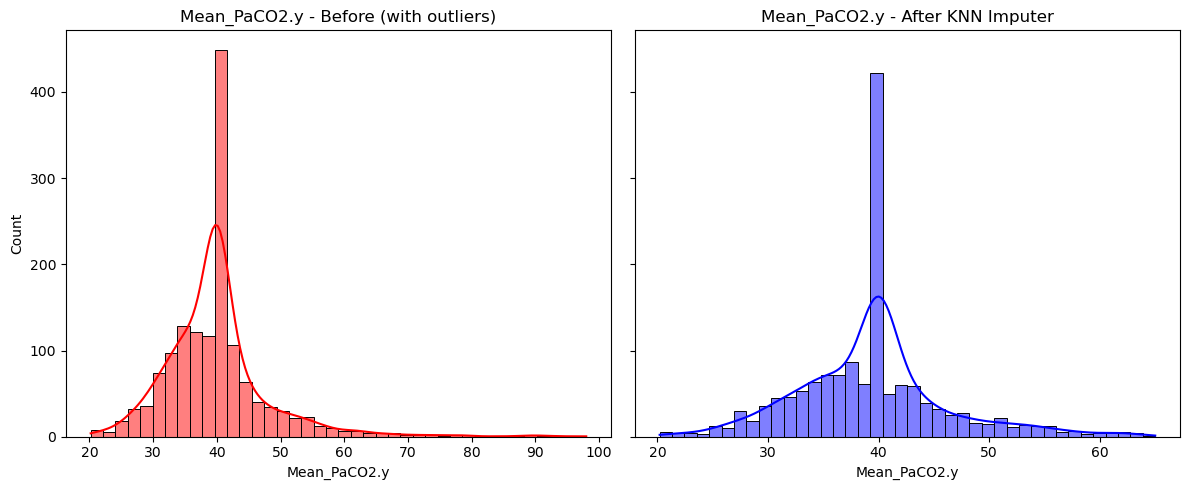

In [52]:
feature = "Mean_PaCO2.y"

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Before
sns.histplot(df_top13_mean[feature], kde=True, bins=40, color="red", ax=axes[0])
axes[0].set_title(f"{feature} - Before (with outliers)")
axes[0].set_xlabel(feature)
axes[0].set_ylabel("Count")

# After
sns.histplot(df_top13_cleaned[feature], kde=True, bins=40, color="blue", ax=axes[1])
axes[1].set_title(f"{feature} - After KNN Imputer")
axes[1].set_xlabel(feature)
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [53]:
df_top13_cleaned

,Mean_GCS.y,Mean_Temp.y,Mean_PaCO2.y,Mean_BUN.y,Mean_Lactate.y,Mean_WBC.y,Mean_HR.y,Mean_Glucose.y,Mean_SysABP.y,Mean_Urine.y,Mean_Platelets.y,Mean_HCO3.y,Mean_Bilirubin.y
0,15.000000,36.233333,40.033301,10.00000,2.08742,7.9,68.200000,117.0,120.245774,222.024990,284.000000,28.0,0.20000
1,15.000000,36.640000,40.033301,25.00000,2.08742,4.8,70.000000,92.0,120.245774,64.722222,97.000000,20.0,1.92985
2,8.888889,37.816667,32.750000,16.50000,2.08742,13.0,94.880000,153.0,125.600000,68.888889,174.000000,20.5,0.40000
3,9.600000,36.980000,26.000000,58.00000,2.05000,23.5,65.341463,118.5,122.758621,36.000000,102.000000,12.5,0.30000
4,15.000000,36.760000,40.033301,23.00000,2.08742,15.2,125.291667,112.0,120.245774,250.000000,269.957032,25.0,1.92985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,10.777778,36.825000,40.033301,14.00000,2.08742,11.4,85.833333,96.0,120.245774,159.062500,318.000000,23.0,1.92985
1470,14.666667,36.716667,40.033301,69.00000,2.08742,11.0,77.869565,102.0,120.245774,71.545455,160.000000,20.0,0.90000
1471,10.000000,37.250000,37.833333,15.00000,2.08742,8.0,102.458333,111.0,121.541667,154.583333,205.000000,27.0,1.92985
1472,14.750000,37.185714,41.000000,18.00000,1.10000,17.5,97.642857,106.0,124.500000,45.318182,218.000000,22.0,1.92985


In [54]:
X = df_top13_cleaned
y = df["In.hospital_death"] #USE THIS FOR Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

clf_1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
Y_pred1 = clf_1.predict(X_test)  # calculate the predicted values
# print the accuracy of the RFC
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred1),3)))
print('Recall {0}'.format(np.round(recall_score(y_test, Y_pred1),3)))
print("Precision:", round(precision_score(y_test, y_pred), 3))



# loop over all the names and feature importance and print both


# Put feature importances into a DataFrame
feature_importances_1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_1.feature_importances_
})

# Sort by importance
feature_importances_1 = feature_importances_1.sort_values(by="importance", ascending=False)

feature_importances_1.head(13)

Accuracy 0.671
Recall 0.453
Precision: 0.348


,feature,importance
0,Mean_GCS.y,0.164300
9,Mean_Urine.y,0.089950
5,Mean_WBC.y,0.079992
6,Mean_HR.y,0.079470
1,Mean_Temp.y,0.071887
7,Mean_Glucose.y,0.071106
3,Mean_BUN.y,0.070710
10,Mean_Platelets.y,0.069598
4,Mean_Lactate.y,0.066461
8,Mean_SysABP.y,0.065962


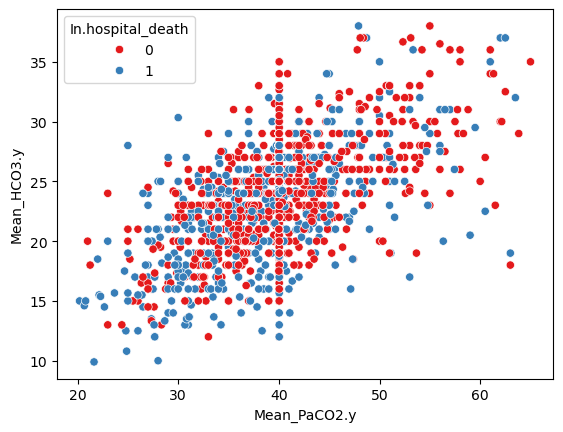

In [55]:

sns.scatterplot(
    data=df_top13_cleaned, 
    x="Mean_PaCO2.y", 
    y="Mean_HCO3.y", 
    hue=df["In.hospital_death"],   # hue gives auto legend
    palette="Set1"
)
plt.show()


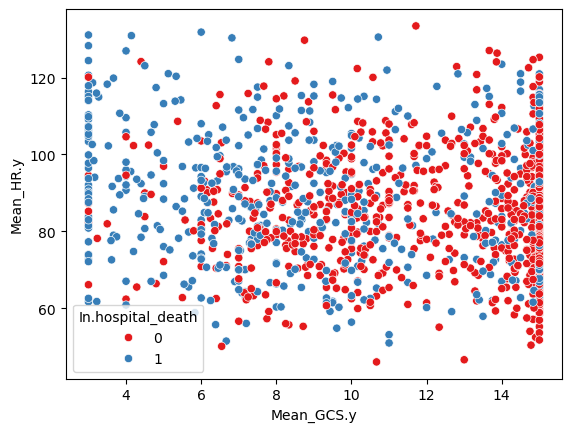

In [56]:
sns.scatterplot(
    data=df_top13_cleaned, 
    x="Mean_GCS.y", 
    y="Mean_HR.y", 
    hue=df["In.hospital_death"],   # hue gives auto legend
    palette="Set1"
)
plt.show()

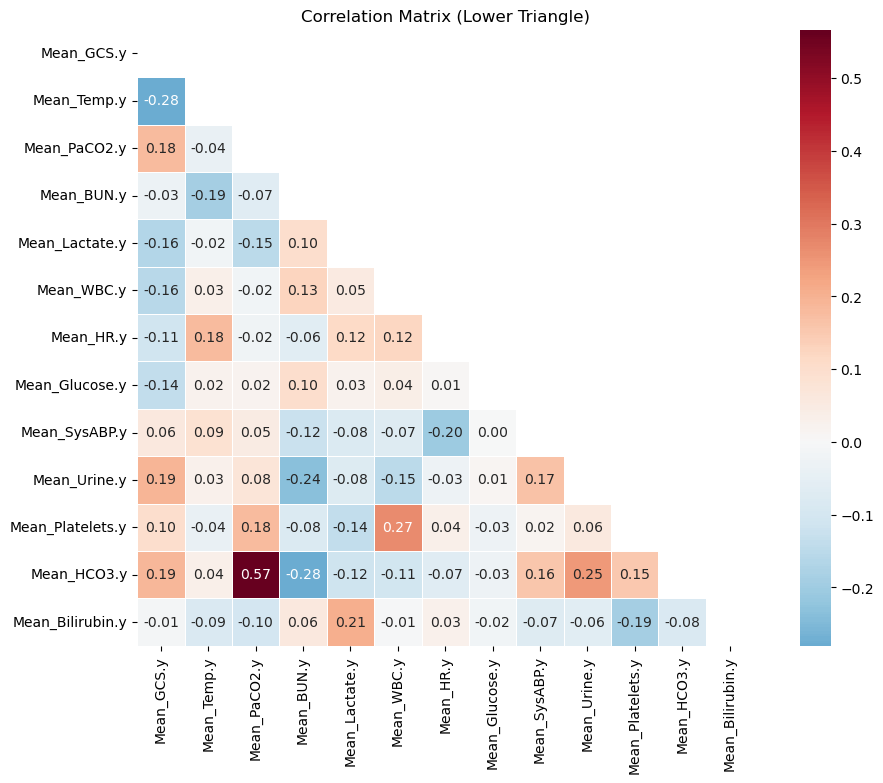

In [57]:
corr = df_top13_cleaned.corr() # calculate the correlation table, first dropping the Class column
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(
    corr, 
    mask=mask,        # hide upper triangle
    annot=True, 
    cmap="RdBu_r", 
    center=0, 
    fmt=".2f", 
    square=True, 
    linewidths=0.5
)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

In [58]:
to_keep = ["Mean_GCS.y","Mean_PaCO2.y","Mean_HR.y","Mean_Platelets.y", "Mean_HCO3.y", "Mean_Temp.y", "Mean_Urine.y" ]


df_top_7 = df_top13_cleaned[to_keep]

X = df_top_7
y = df["In.hospital_death"] #USE THIS FOR Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

clf_1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
Y_pred1 = clf_1.predict(X_test)  # calculate the predicted values
# print the accuracy of the RFC
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred1),3)))
print('Recall {0}'.format(np.round(recall_score(y_test, Y_pred1),3)))


# loop over all the names and feature importance and print both


# Put feature importances into a DataFrame
feature_importances_1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_1.feature_importances_
})

# Sort by importance
feature_importances_1 = feature_importances_1.sort_values(by="importance", ascending=False)

feature_importances_1.head(7)

Accuracy 0.705
Recall 0.443


,feature,importance
0,Mean_GCS.y,0.211104
6,Mean_Urine.y,0.151988
2,Mean_HR.y,0.139463
3,Mean_Platelets.y,0.135162
5,Mean_Temp.y,0.131629
1,Mean_PaCO2.y,0.123813
4,Mean_HCO3.y,0.106840


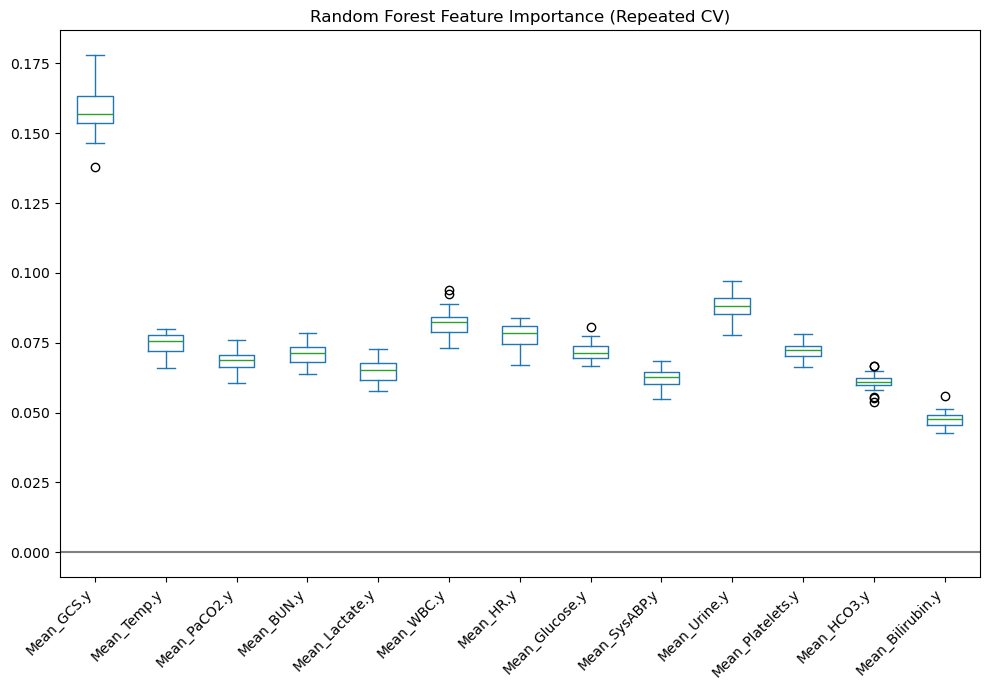

In [59]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier


X = df_top13_cleaned
y = df["In.hospital_death"]

scores = cross_validate(
    RandomForestClassifier(), X, y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.feature_importances_ for est in scores['estimator']], columns=X.columns)
# plot the descriptive statics of the coefficients in a box and whisker plot to show variability
ax = coefs.plot(kind='box', figsize=(10, 7))
plt.title('Random Forest Feature Importance (Repeated CV)')
plt.axhline(y=0, color='.5')
plt.xticks(rotation=45, ha='right')  # 🔸 rotate labels 45° and align to the right
plt.tight_layout()
plt.show()

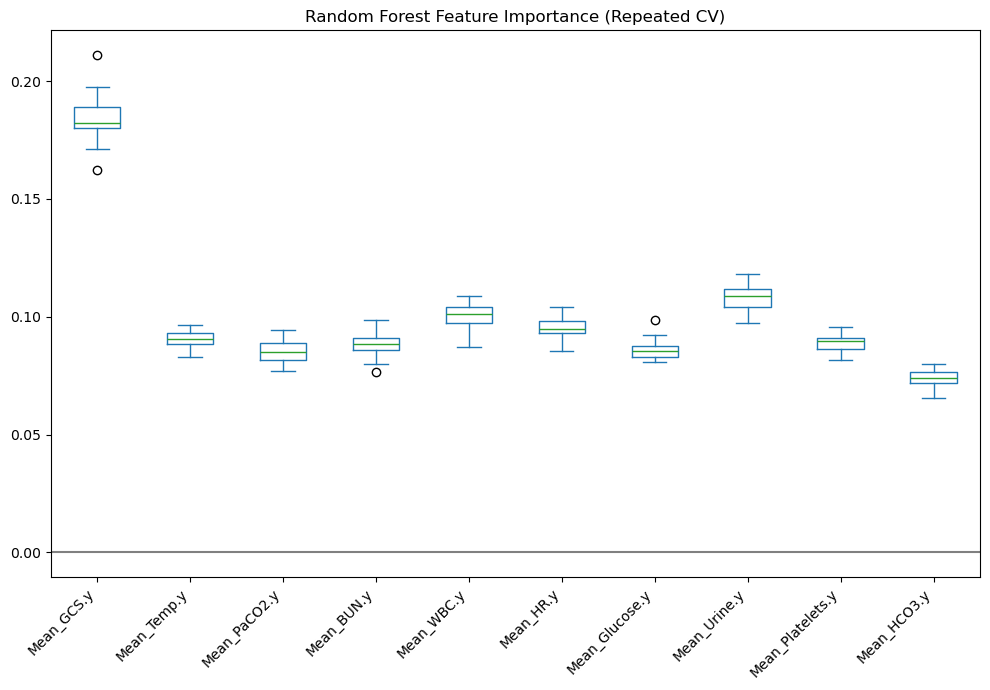

In [60]:
final_keep = ["Mean_GCS.y", "Mean_Temp.y", "Mean_PaCO2.y", "Mean_BUN.y", "Mean_WBC.y", "Mean_HR.y", "Mean_Glucose.y", "Mean_Urine.y", "Mean_Platelets.y", "Mean_HCO3.y"]

from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
df_top10 = df_top13_cleaned[final_keep]

X = df_top10
y = df["In.hospital_death"]

scores = cross_validate(
    RandomForestClassifier(), X, y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.feature_importances_ for est in scores['estimator']], columns=X.columns)
# plot the descriptive statics of the coefficients in a box and whisker plot to show variability
ax = coefs.plot(kind='box', figsize=(10, 7))
plt.title('Random Forest Feature Importance (Repeated CV)')
plt.axhline(y=0, color='.5')
plt.xticks(rotation=45, ha='right')  # 🔸 rotate labels 45° and align to the right
plt.tight_layout()
plt.show()

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X = df_top10
y = df["In.hospital_death"] #USE THIS FOR Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

clf_1 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
Y_pred1 = clf_1.predict(X_test)  # calculate the predicted values
# print the accuracy of the RFC
# Print metrics
print('Recall   :', np.round(recall_score(y_test, Y_pred1), 3))
print('Precision:', np.round(precision_score(y_test, Y_pred1), 3))
print('F1 Score :', np.round(f1_score(y_test, Y_pred1), 3))
# loop over all the names and feature importance and print both


# Put feature importances into a DataFrame
feature_importances_1 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_1.feature_importances_
})

# Sort by importance
feature_importances_1 = feature_importances_1.sort_values(by="importance", ascending=False)

feature_importances_1.head(7)

Recall   : 0.522
Precision: 0.619
F1 Score : 0.566


,feature,importance
0,Mean_GCS.y,0.186359
7,Mean_Urine.y,0.105055
1,Mean_Temp.y,0.096690
2,Mean_PaCO2.y,0.095433
4,Mean_WBC.y,0.092812
5,Mean_HR.y,0.091674
8,Mean_Platelets.y,0.087422


AUC Score: 0.706


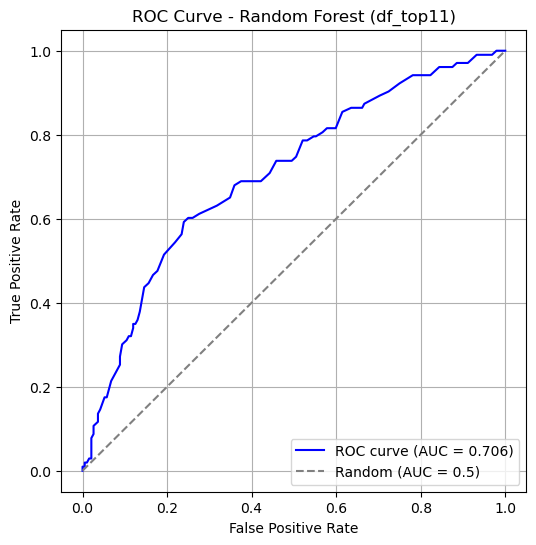

In [62]:

from sklearn.metrics import roc_curve, roc_auc_score


# --- 1️⃣ Data ---
X = df_top10
y = df["In.hospital_death"]  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 2️⃣ Train model ---
clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_1.fit(X_train, y_train)

# --- 3️⃣ Get predicted probabilities for the positive class ---
y_prob = clf_1.predict_proba(X_test)[:, 1]

# --- 4️⃣ Compute ROC curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.3f}")

# --- 5️⃣ Plot ---
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (df_top11)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [63]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Example: pick threshold where TPR ~0.8
idx = np.argmax(tpr >= 0.8)
best_threshold = thresholds[idx]
print("Chosen threshold:", best_threshold)

y_pred_adjusted = (y_prob >= best_threshold).astype(int)
print("Custom threshold:", best_threshold)
print("Accuracy :", np.round(accuracy_score(y_test, y_pred_adjusted), 3))
print("Recall   :", np.round(recall_score(y_test, y_pred_adjusted), 3))
print("Precision:", np.round(precision_score(y_test, y_pred_adjusted), 3))
print("F1 Score :", np.round(f1_score(y_test, y_pred_adjusted), 3))



Chosen threshold: 0.25
Custom threshold: 0.25
Accuracy : 0.563
Recall   : 0.806
Precision: 0.432
F1 Score : 0.563


In [64]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd
import numpy as np

# ---- Data ----
X = df_top10
y = df["In.hospital_death"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Model & search space ----
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "recall": "recall",
    "roc_auc": "roc_auc",
    "f1": "f1",
    "precision": "precision",
    "accuracy": "accuracy",
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall",          
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Best params (by recall):", grid.best_params_)
print("Best CV recall:", round(grid.best_score_, 3))






Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [ ]:

best_rf = grid.best_estimator_

y_pred_test = best_rf.predict(X_test)
y_prob_test = best_rf.predict_proba(X_test)[:, 1]


print("Test Accuracy :", round(accuracy_score(y_test, y_pred_test), 3))
print("Test Recall   :", round(recall_score(y_test, y_pred_test), 3))
print("Test Precision:", round(precision_score(y_test, y_pred_test), 3))
print("Test F1 Score :", round(f1_score(y_test, y_pred_test), 3))
print("Test AUC      :", round(roc_auc_score(y_test, y_prob_test), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, digits=3))


Test Accuracy : 0.705
Test Recall   : 0.577
Test Precision: 0.615
Test F1 Score : 0.595
Test AUC      : 0.763

Classification Report:
               precision    recall  f1-score   support

           0      0.754     0.783     0.768       184
           1      0.615     0.577     0.595       111

    accuracy                          0.705       295
   macro avg      0.685     0.680     0.682       295
weighted avg      0.702     0.705     0.703       295



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
youden_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[youden_idx] 
print(best_threshold)

y_pred_adj = (y_prob_test >= best_threshold).astype(int)
print("Recall after threshold tuning:", round(recall_score(y_test, y_pred_adj), 3))
print("Precision after threshold tuning:", round(precision_score(y_test, y_pred_adj), 3))


0.4025322696760549
Recall after threshold tuning: 0.802
Precision after threshold tuning: 0.563


# BEST MODEL


In [65]:


# --- 1️⃣ Split the data ---
X = df_top10
y = df["In.hospital_death"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 2️⃣ Rebuild model with best params ---
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 800
}

rf_best = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"   # Optional: helps if classes are imbalanced
)

# --- 3️⃣ Train the model ---
rf_best.fit(X_train, y_train)

# --- 4️⃣ Get predicted probabilities ---
y_prob = rf_best.predict_proba(X_test)[:, 1]

# --- 5️⃣ Use your best threshold for classification ---
best_threshold = 0.4025322696760549

y_pred = (y_prob >= best_threshold).astype(int)

# --- 6️⃣ Evaluate ---
print("Using threshold:", best_threshold)
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1 Score :", round(f1_score(y_test, y_pred), 3))
print("ROC AUC  :", round(roc_auc_score(y_test, y_prob), 3))  # AUC always uses probabilities

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


Using threshold: 0.4025322696760549
Accuracy : 0.692
Recall   : 0.802
Precision: 0.563
F1 Score : 0.662
ROC AUC  : 0.763

Classification Report:
               precision    recall  f1-score   support

           0      0.839     0.625     0.717       184
           1      0.563     0.802     0.662       111

    accuracy                          0.692       295
   macro avg      0.701     0.713     0.689       295
weighted avg      0.736     0.692     0.696       295



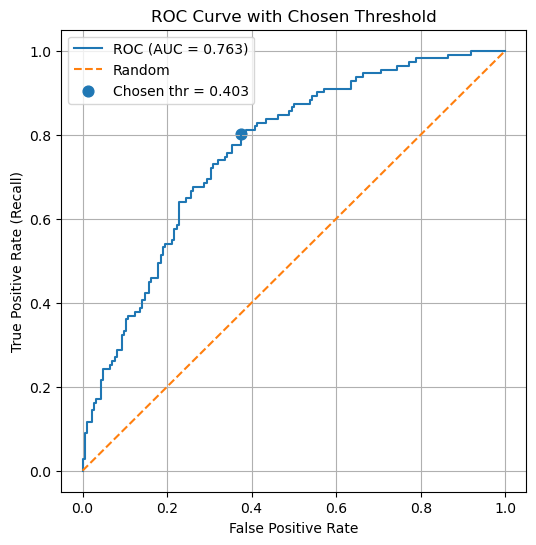

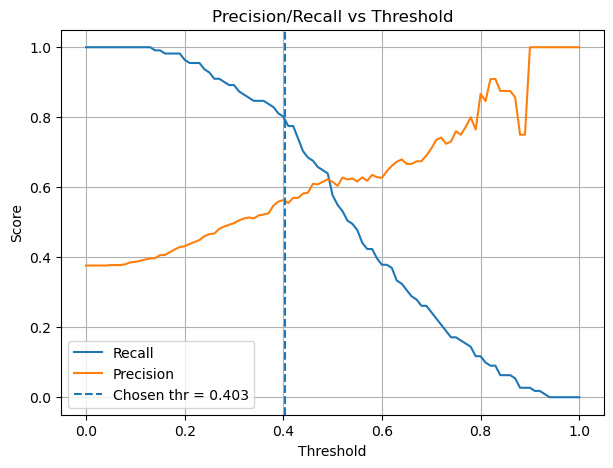

<Figure size 500x500 with 0 Axes>

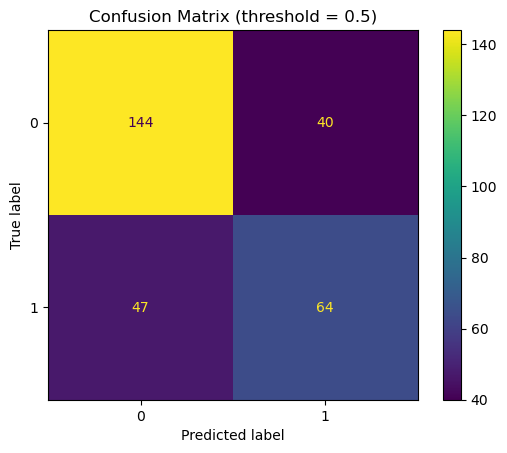

<Figure size 500x500 with 0 Axes>

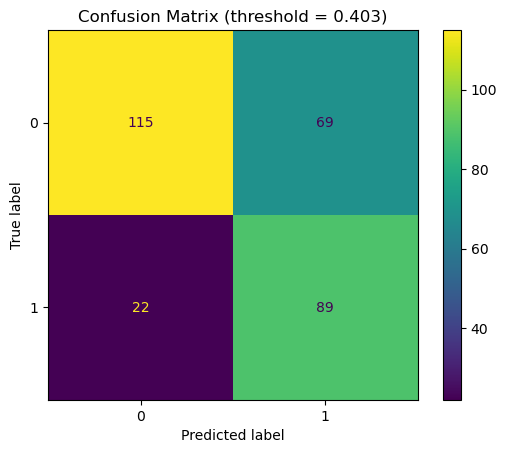

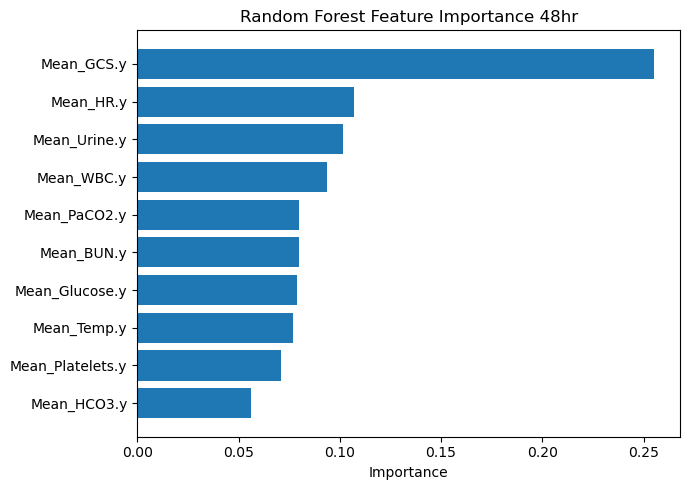

In [66]:

# Probabilities and default 0.5 predictions
y_prob = rf_best.predict_proba(X_test)[:, 1]
y_pred_05 = (y_prob >= 0.5).astype(int)
y_pred_bt = (y_prob >= best_threshold).astype(int)

# ---------- 1) ROC curve with threshold marker ----------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# find the point on ROC closest to your chosen threshold
# (thresholds array is aligned with fpr/tpr)
bt_idx = np.argmin(np.abs(thresholds - best_threshold))

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Random")
plt.scatter(fpr[bt_idx], tpr[bt_idx], s=60, label=f"Chosen thr = {best_threshold:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve with Chosen Threshold")
plt.legend()
plt.grid(True)
plt.show()


# ---------- 3) Threshold vs Precision/Recall trade-off ----------
# Build a smooth curve by evaluating at many thresholds
ths = np.linspace(0.0, 1.0, 101)
precisions, recalls = [], []
for t in ths:
    yp = (y_prob >= t).astype(int)
    # Safe precision when no positives predicted
    tp = np.sum((yp==1) & (y_test==1))
    fp = np.sum((yp==1) & (y_test==0))
    fn = np.sum((yp==0) & (y_test==1))
    precision = tp / (tp + fp) if (tp+fp) > 0 else 1.0
    recall    = tp / (tp + fn) if (tp+fn) > 0 else 0.0
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(7,5))
plt.plot(ths, recalls, label="Recall")
plt.plot(ths, precisions, label="Precision")
plt.axvline(best_threshold, linestyle="--", label=f"Chosen thr = {best_threshold:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 4) Confusion matrices (0.5 vs chosen threshold) ----------
cm_05 = confusion_matrix(y_test, y_pred_05)
cm_bt = confusion_matrix(y_test, y_pred_bt)

plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(cm_05).plot(values_format='d')
plt.title("Confusion Matrix (threshold = 0.5)")
plt.show()

plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(cm_bt).plot(values_format='d')
plt.title(f"Confusion Matrix (threshold = {best_threshold:.3f})")
plt.show()

# ---------- 5) Feature importance (top 15) ----------
import pandas as pd
fi = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_best.feature_importances_
}).sort_values("importance", ascending=False)

top_k = 15 if len(fi) > 15 else len(fi)
plt.figure(figsize=(7, 0.4*top_k + 1))
plt.barh(fi["feature"].head(top_k)[::-1], fi["importance"].head(top_k)[::-1])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance 48hr")
plt.tight_layout()
plt.show()


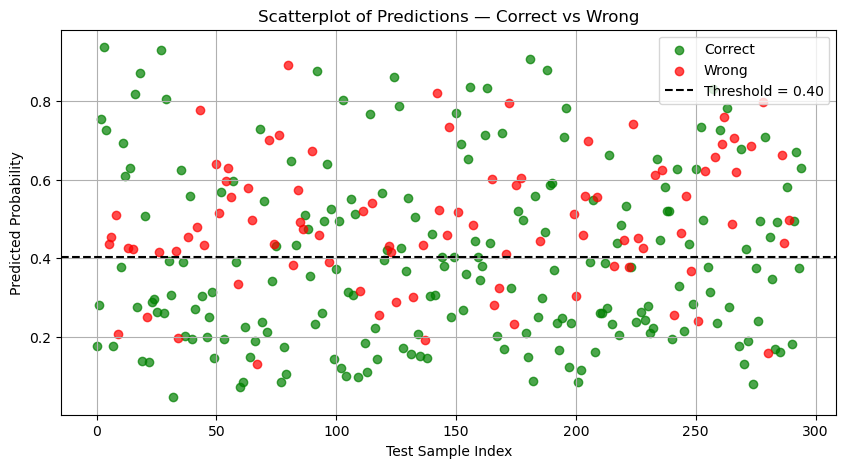

In [ ]:
# Create boolean mask for correct vs incorrect predictions
correct_mask = (y_pred_bt == y_test)
incorrect_mask = ~correct_mask

plt.figure(figsize=(10,5))
# Plot correct predictions
plt.scatter(
    np.arange(len(y_test))[correct_mask],
    y_prob[correct_mask],
    color="green",
    label="Correct",
    alpha=0.7
)
# Plot incorrect predictions
plt.scatter(
    np.arange(len(y_test))[incorrect_mask],
    y_prob[incorrect_mask],
    color="red",
    label="Wrong",
    alpha=0.7
)

plt.axhline(y=best_threshold, color="black", linestyle="--", label=f"Threshold = {best_threshold:.2f}")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Scatterplot of Predictions — Correct vs Wrong")
plt.legend()
plt.grid(True)
plt.show()


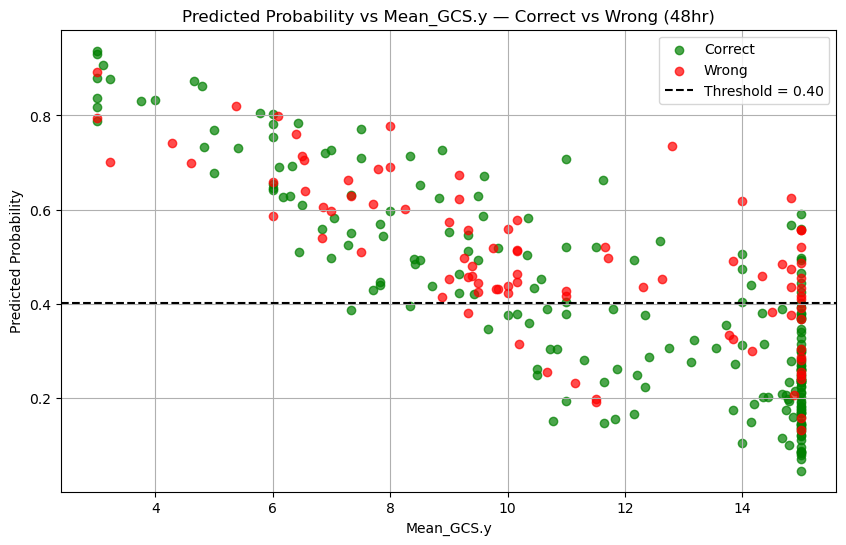

In [67]:
key_feature = "Mean_GCS.y"   # <-- change if your GCS column has a different name

x = X_test[key_feature].to_numpy()      # x-axis values (GCS)
p = y_prob                               # y-axis values (predicted prob)

correct_mask   = (y_pred_bt == y_test)
incorrect_mask = ~correct_mask

plt.figure(figsize=(10,6))
plt.scatter(x[correct_mask],   p[correct_mask],   label="Correct", color="green", alpha=0.7)
plt.scatter(x[incorrect_mask], p[incorrect_mask], label="Wrong",   color="red",   alpha=0.7)

plt.axhline(best_threshold, color="black", linestyle="--", label=f"Threshold = {best_threshold:.2f}")
plt.xlabel(key_feature)
plt.ylabel("Predicted Probability")
plt.title(f"Predicted Probability vs {key_feature} — Correct vs Wrong (48hr)")
plt.legend()
plt.grid(True)
plt.show()


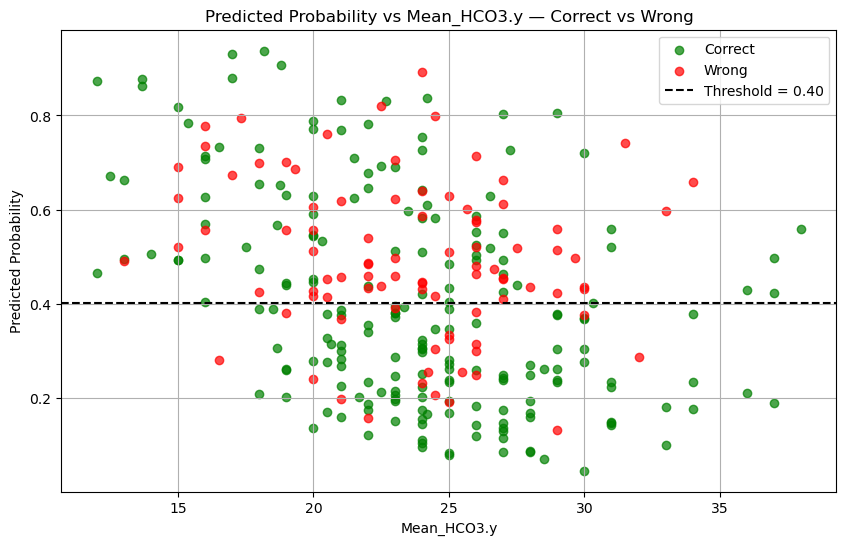

In [ ]:
key_feature = "Mean_HCO3.y"   # <-- change if your GCS column has a different name

x = X_test[key_feature].to_numpy()      # x-axis values (GCS)
p = y_prob                               # y-axis values (predicted prob)

correct_mask   = (y_pred_bt == y_test)
incorrect_mask = ~correct_mask

plt.figure(figsize=(10,6))
plt.scatter(x[correct_mask],   p[correct_mask],   label="Correct", color="green", alpha=0.7)
plt.scatter(x[incorrect_mask], p[incorrect_mask], label="Wrong",   color="red",   alpha=0.7)

plt.axhline(best_threshold, color="black", linestyle="--", label=f"Threshold = {best_threshold:.2f}")
plt.xlabel(key_feature)
plt.ylabel("Predicted Probability")
plt.title(f"Predicted Probability vs {key_feature} — Correct vs Wrong")
plt.legend()
plt.grid(True)
plt.show()
